In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
os.chdir('/Users/stevensuser/Library/CloudStorage/OneDrive-stevens.edu/PhD_research/BB')
ret_cds_df = pd.read_pickle("ret_cds_us_20nan_5_21.pkl")

In [5]:
os.chdir('/Users/stevensuser/Library/CloudStorage/OneDrive-stevens.edu/PhD_research/Qual')
fred_raw_df = pd.read_csv("fred_data.csv",index_col=0)

In [6]:
# match the dates
fred_raw_df.index = pd.to_datetime(fred_raw_df.index)
fred_df = fred_raw_df[fred_raw_df.index.isin(ret_cds_df.index)]

## Take cf for each year

In [12]:
def cf_ts(ret_data, ncf):
    """Get a time series format 2D array of implied common factor

       Arguments:
            ret_data: time series format data frame
            ncf     : number of common factors

       Returns:
            common factor time series from 2005 to 2021
    """
    
    kx = 0
    cf_dict  = {}
    #print(len(ret_data.columns))
    
    for ix in range(2005,2022): # each year
        ret_cds_df1 = ret_data.loc[f"{2005+kx}-01-01": f"{2005+kx}-12-31",:] # same names through years        
        
        # extract the common factor
        u_v, s_v, vt_v = np.linalg.svd(ret_cds_df1, full_matrices = False)
        plt.plot(s_v/np.sum(s_v))
            
        u_v_p = u_v[:, :ncf]
            
        # model dict per year
        cf_dict[f"{2005+kx}-01-01", f"{2005+kx}-12-31"]  = u_v_p#.to_numpy()
        
        kx += 1 # go to next year

    return cf_dict

189
189


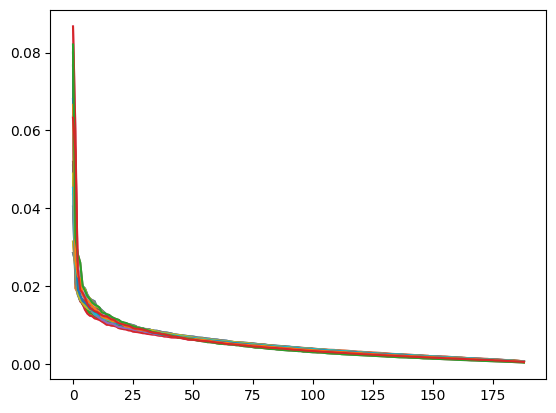

In [13]:
cf_20_dict = cf_ts(ret_cds_df, 20)
cf_5_dict = cf_ts(ret_cds_df, 5)

In [15]:
# 20 cf
cor_20_dict = {}
for kx in range(2022-2005):
    xx = cf_20_dict[f"{2005+kx}-01-01", f"{2005+kx}-12-31"]
    yy = fred_df[(fred_df.index >= f"{2005+kx}-01-01") & (fred_df.index <= f"{2005+kx}-12-31")]
    cor_20_dict[f"{2005+kx}"] = np.corrcoef(xx, yy, rowvar=False)

In [16]:
# 5 cf
cor_5_dict = {}
for kx in range(2022-2005):
    xx = cf_5_dict[f"{2005+kx}-01-01", f"{2005+kx}-12-31"]
    yy = fred_df[(fred_df.index >= f"{2005+kx}-01-01") & (fred_df.index <= f"{2005+kx}-12-31")]
    cor_5_dict[f"{2005+kx}"] = np.corrcoef(xx, yy, rowvar=False)

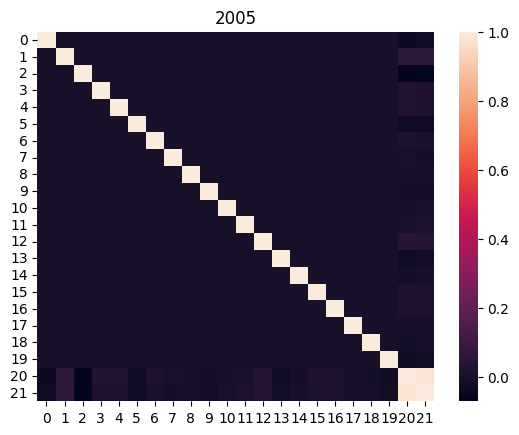

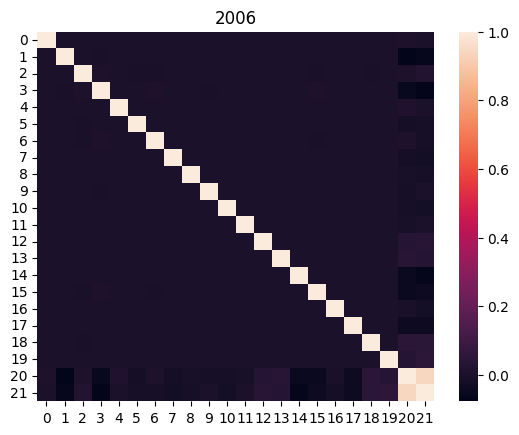

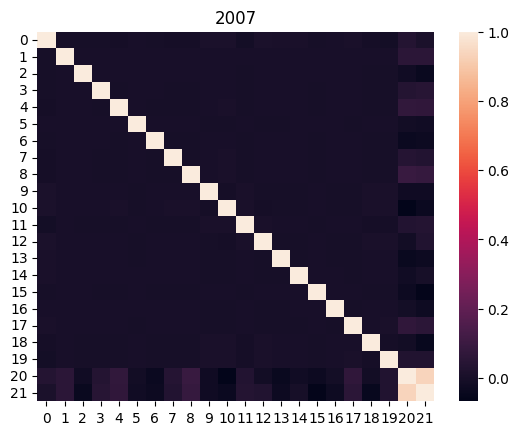

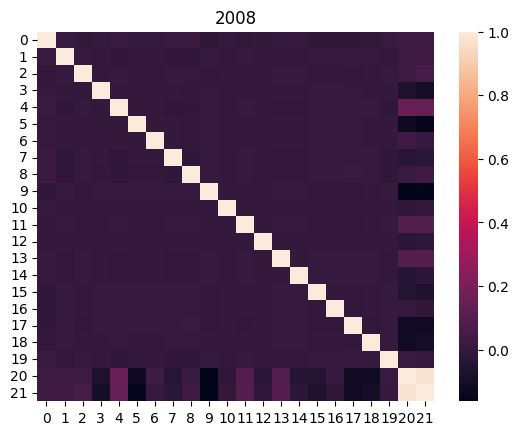

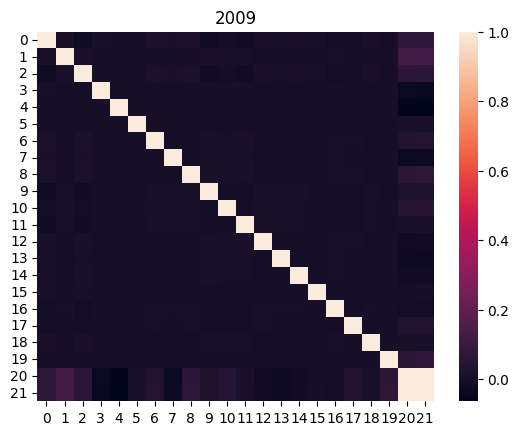

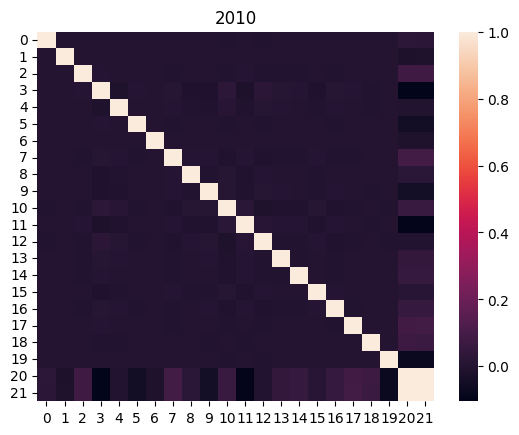

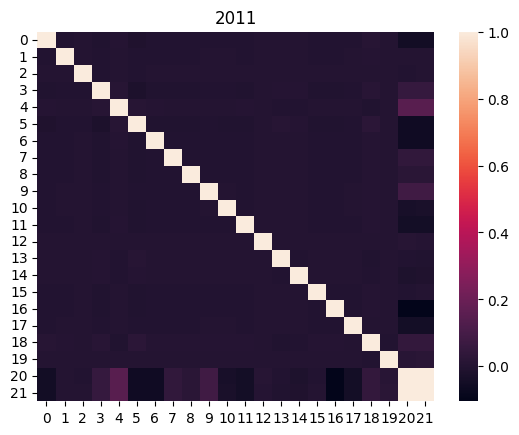

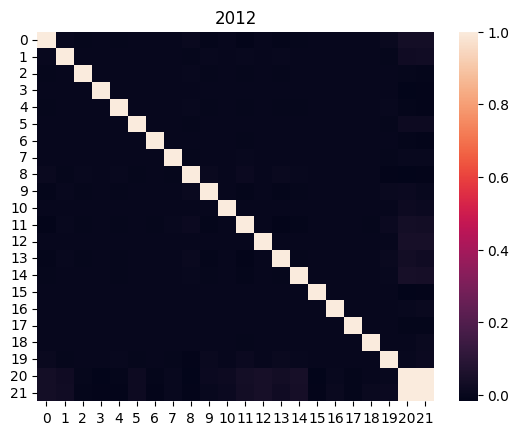

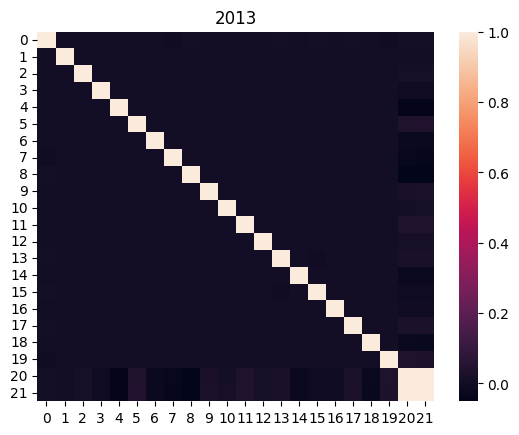

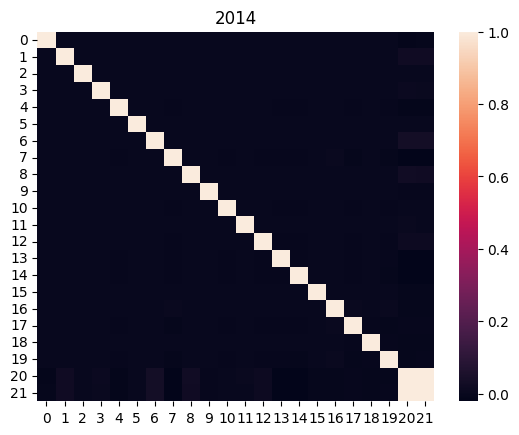

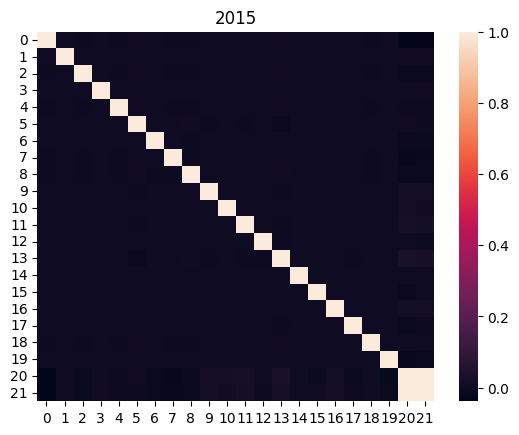

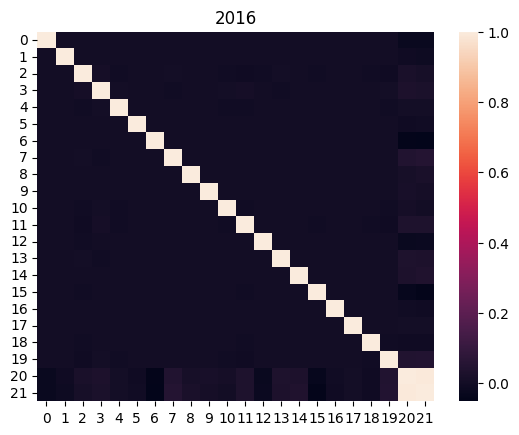

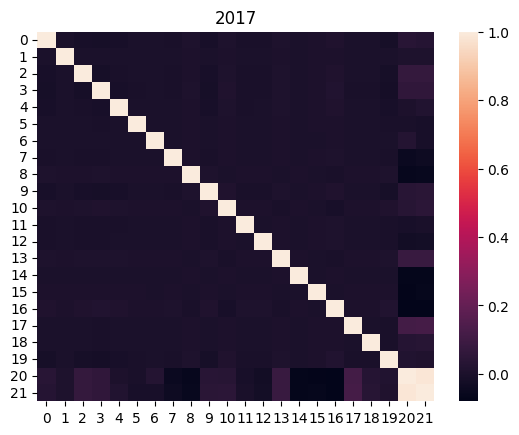

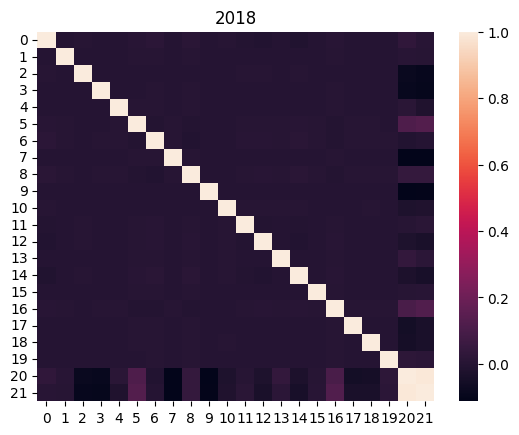

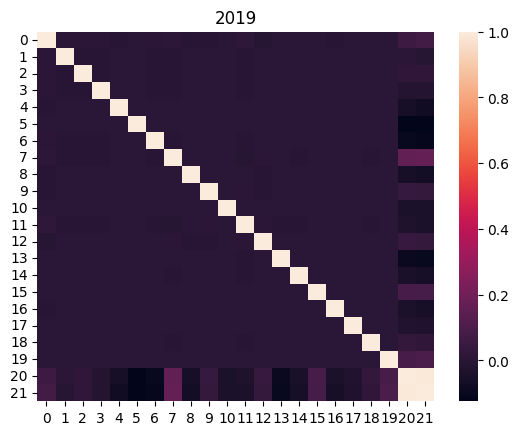

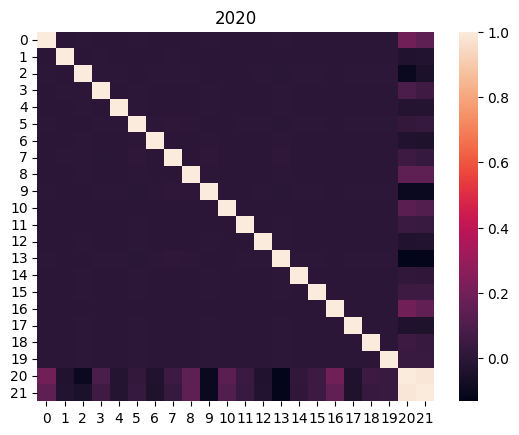

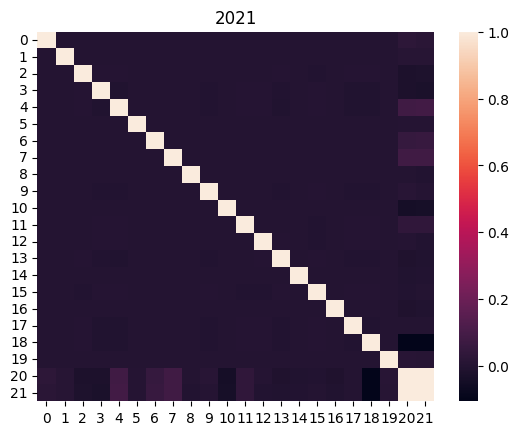

In [42]:
for kx in range(2022-2005):
    sb.heatmap(cor_20_dict[f"{2005+kx}"])
    plt.title(f"{2005+kx}")
    plt.show()

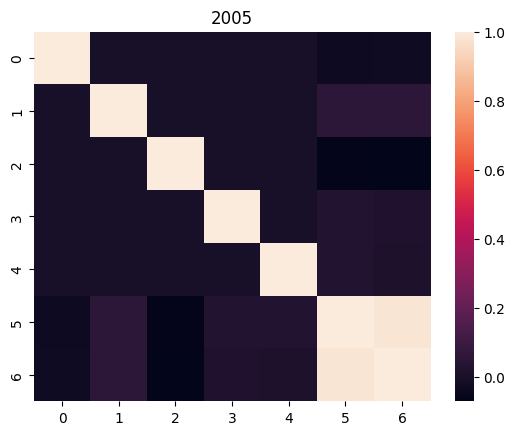

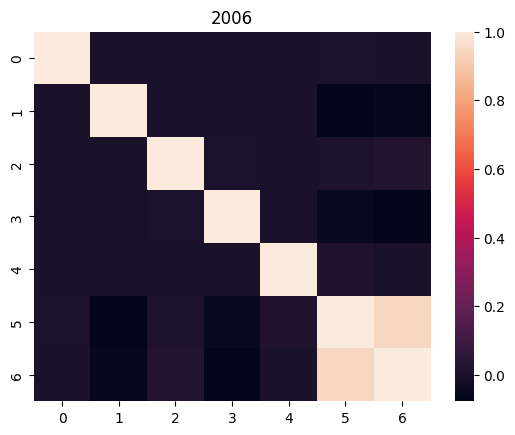

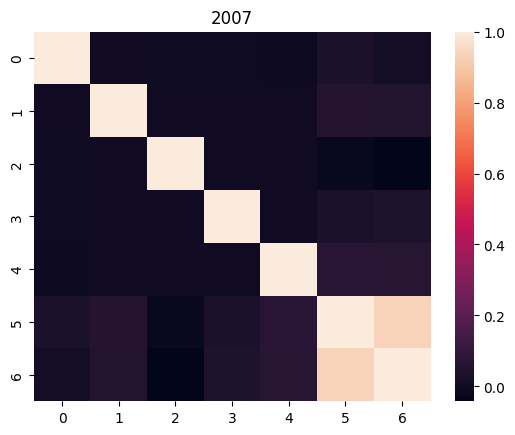

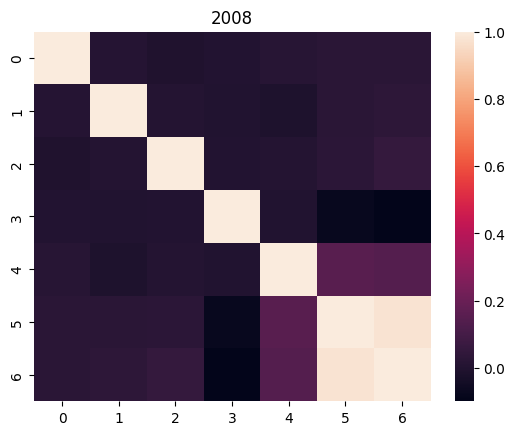

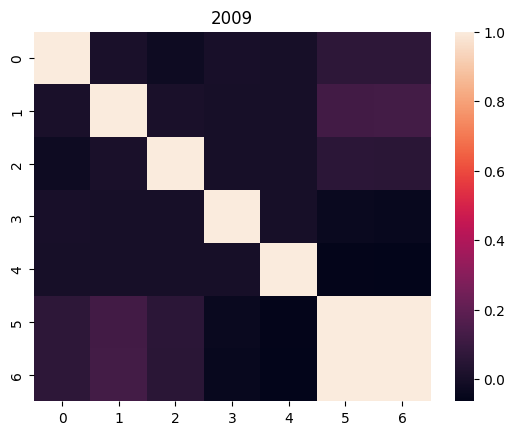

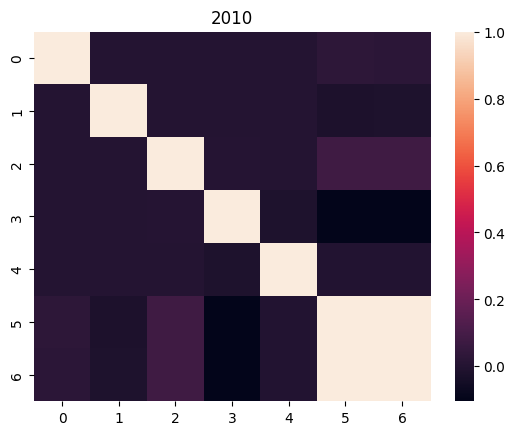

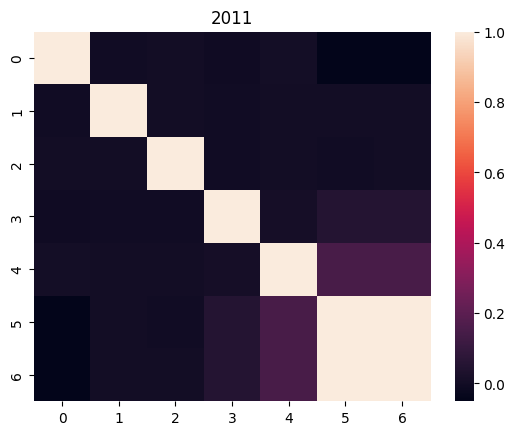

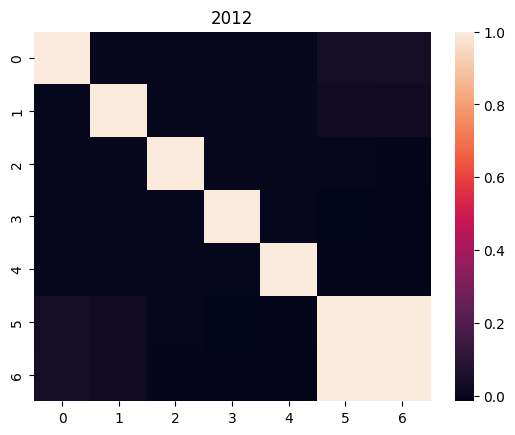

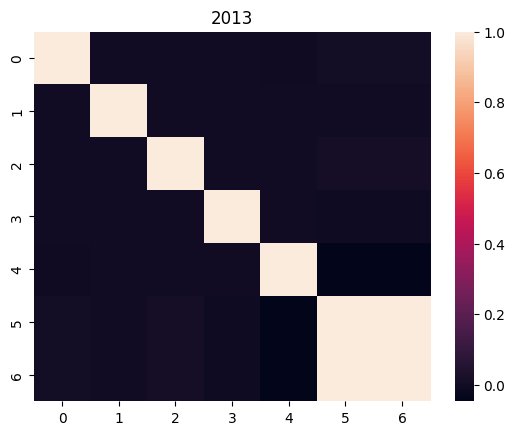

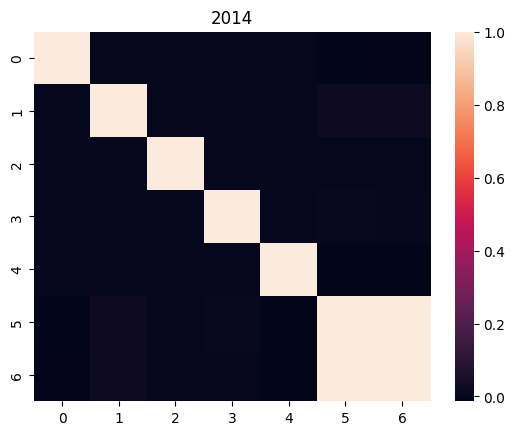

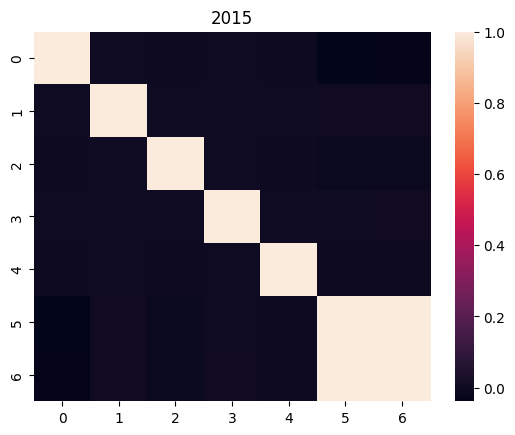

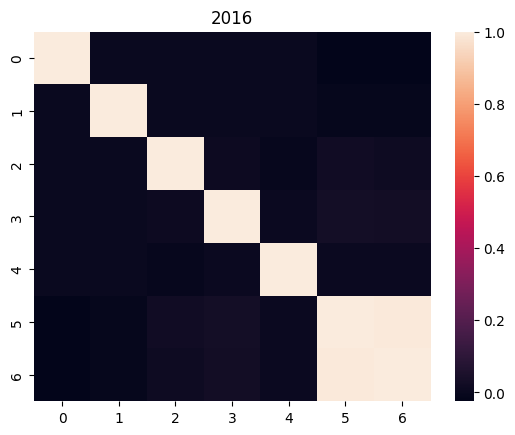

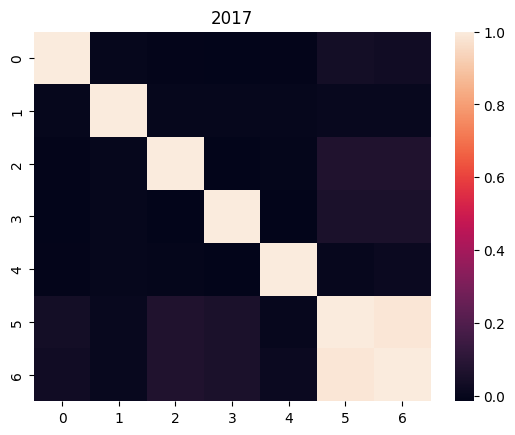

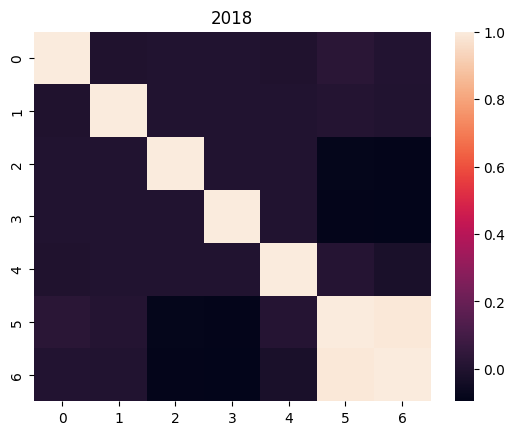

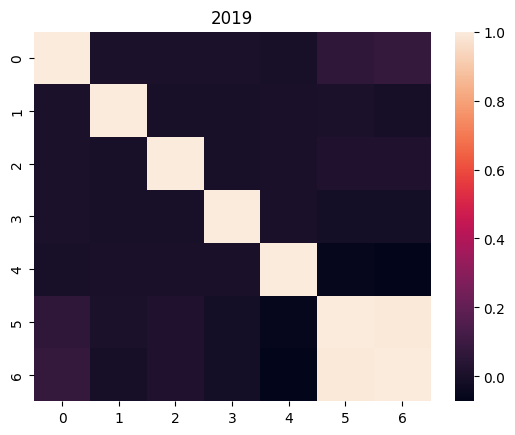

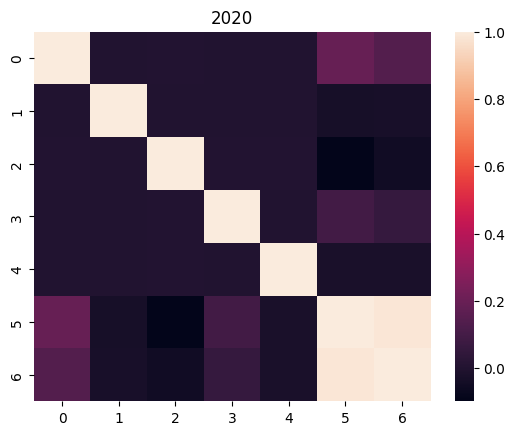

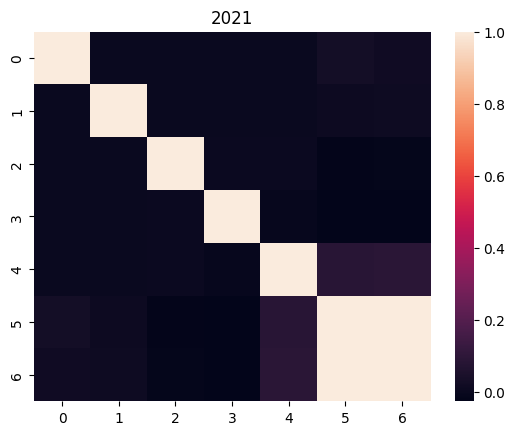

In [44]:
for kx in range(2022-2005):
    sb.heatmap(cor_5_dict[f"{2005+kx}"])
    plt.title(f"{2005+kx}")
    plt.show()

## Look into financials

In [34]:
os.chdir('/Users/stevensuser/Library/CloudStorage/OneDrive-stevens.edu/PhD_research/Qual')
bb_info_all = pd.read_csv("qual_data_info_code_input.csv")

In [36]:
fin_bb_id = bb_info_all[bb_info_all.BICS_LEVEL_1_SECTOR_NAME == "Financials"]["ID_BB_COMPANY"]
fin_index = bb_info_all[bb_info_all.BICS_LEVEL_1_SECTOR_NAME == "Financials"].index

24


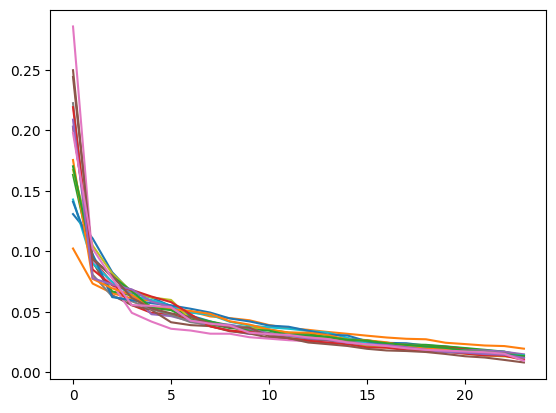

In [39]:
cf_2_fin_dict = cf_ts(ret_cds_df[fin_bb_id], 1, 2)

In [40]:
# 2 cf
cor_2_fin_dict = {}
for kx in range(2022-2005):
    xx = cf_2_fin_dict[f"{2005+kx}-01-01", f"{2005+kx}-12-31"]
    yy = fred_df[(fred_df.index >= f"{2005+kx}-01-01") & (fred_df.index <= f"{2005+kx}-12-31")]
    cor_2_fin_dict[f"{2005+kx}"] = np.corrcoef(xx, yy, rowvar=False)

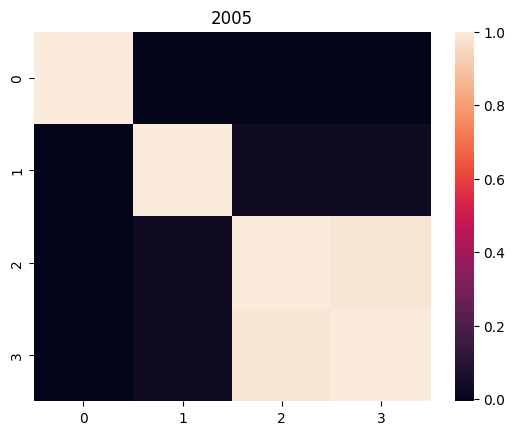

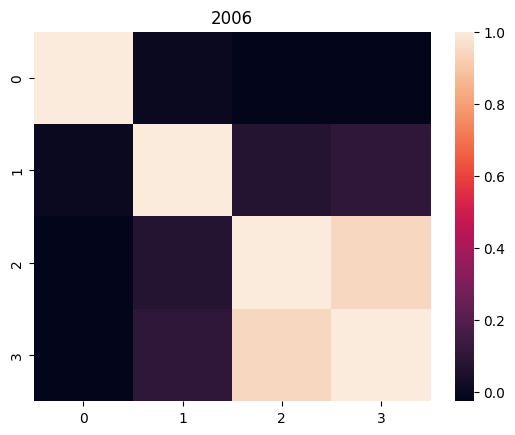

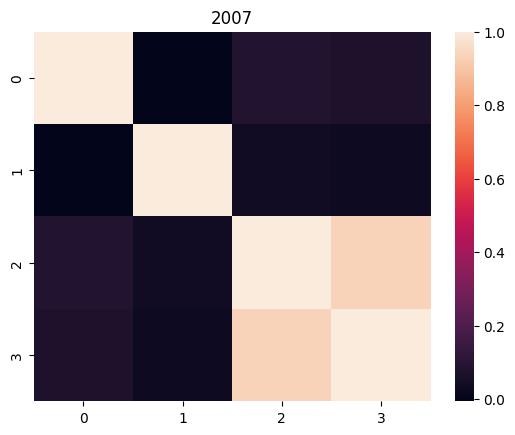

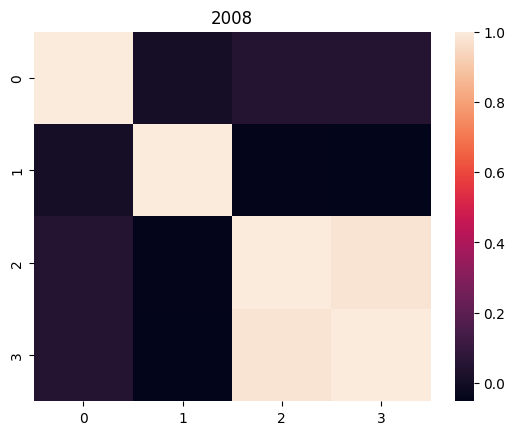

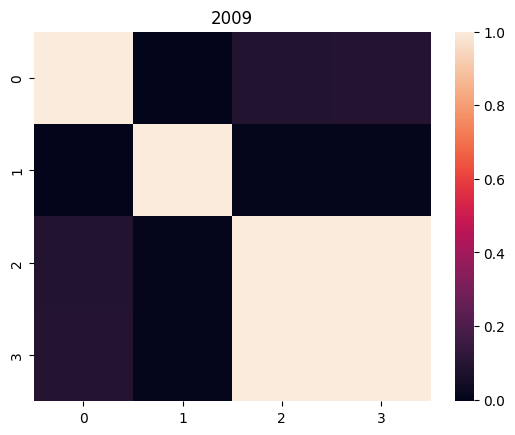

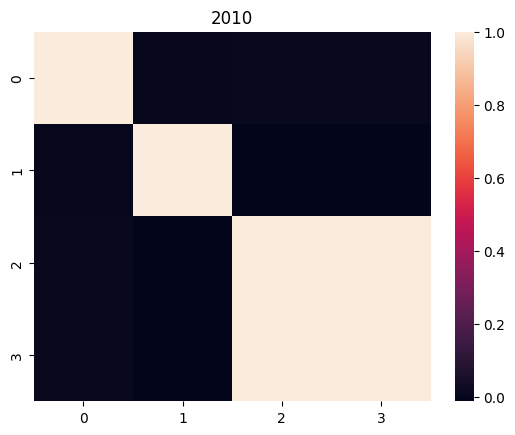

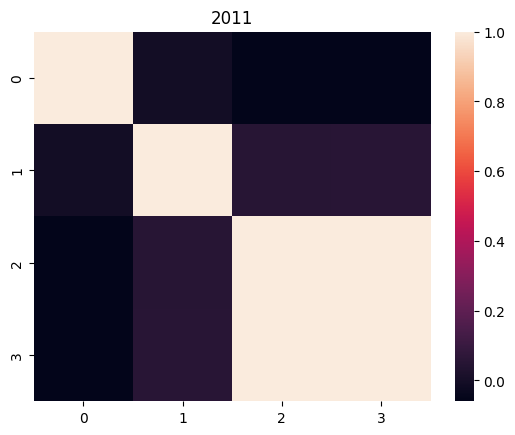

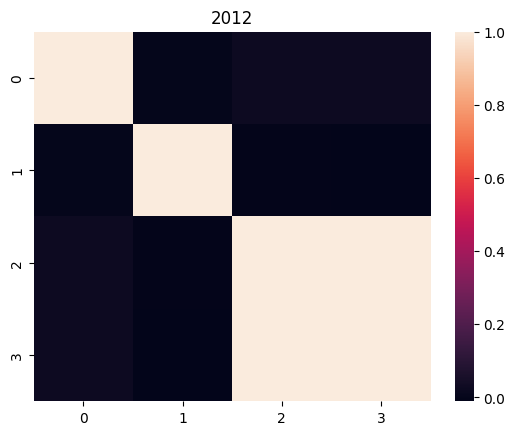

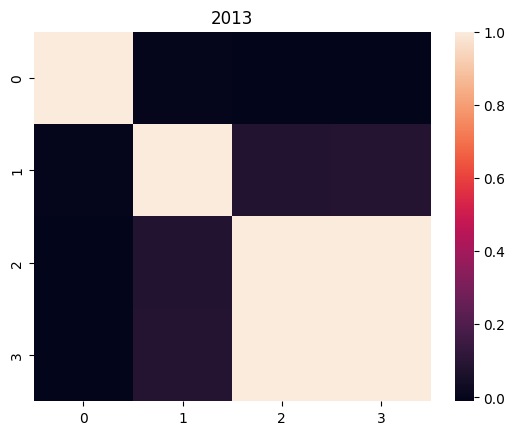

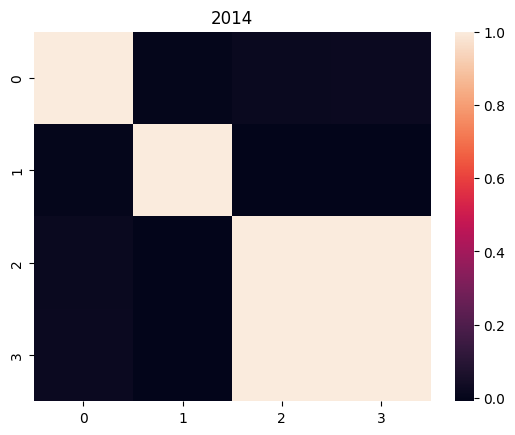

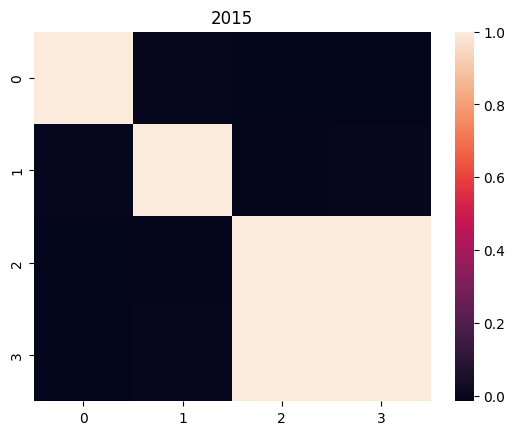

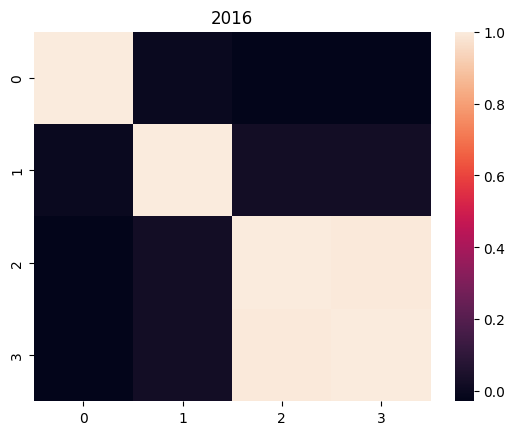

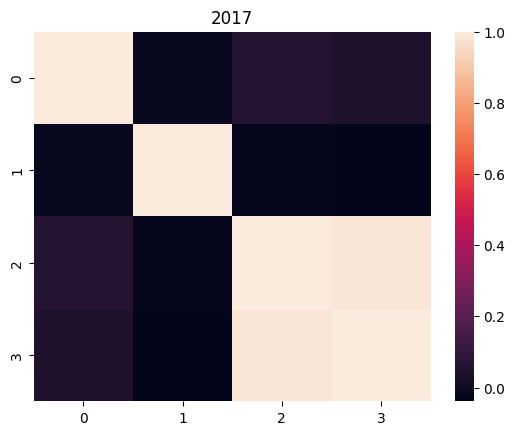

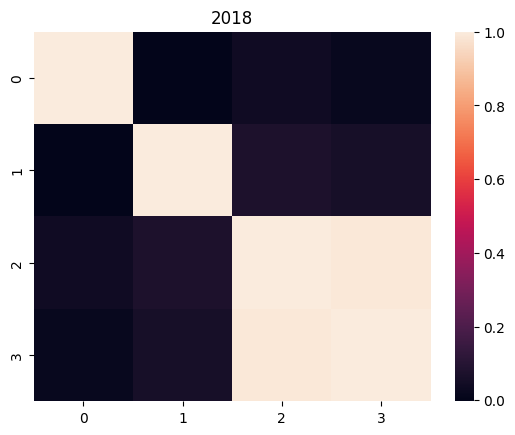

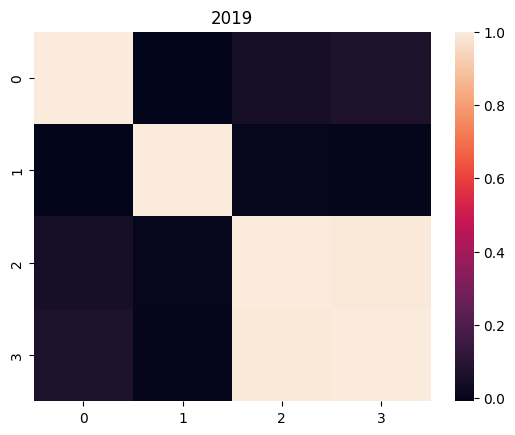

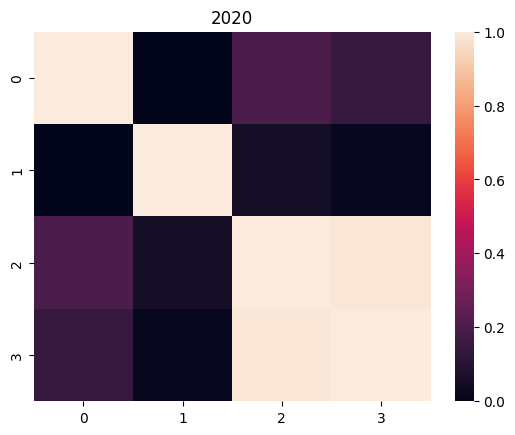

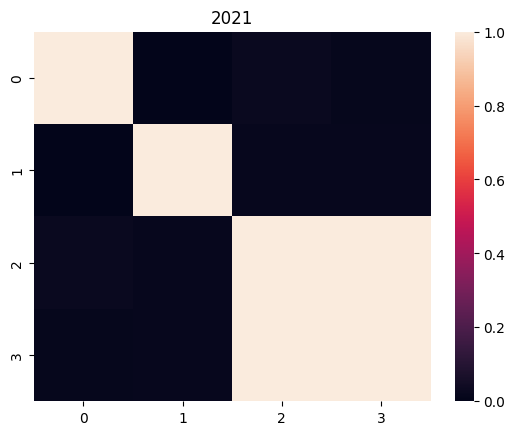

In [46]:
for kx in range(2022-2005):
    sb.heatmap(cor_2_fin_dict[f"{2005+kx}"])
    plt.title(f"{2005+kx}")
    plt.show()

## Take the cf from whole dataset and then apply annual rolling window

In [73]:
ret_cds_df1 = ret_cds_df 
u_v, s_v, vt_v = np.linalg.svd(ret_cds_df1, full_matrices = False)         
u_v_p20 = u_v[:, :20]
u_v_p5 = u_v[:, :5]

In [74]:
cor_20_all_dict= {}
cor_5_all_dict= {}
kx = 0
for i in range(int(len(u_v_p)/252)):
    cor_20_all_dict[f"{2005+kx}"] = np.corrcoef(u_v_p20[i*252:(i+1)*252], fred_df.iloc[i*252:(i+1)*252,], rowvar=False)
    cor_5_all_dict[f"{2005+kx}"] = np.corrcoef(u_v_p5[i*252:(i+1)*252], fred_df.iloc[i*252:(i+1)*252,], rowvar=False)
    kx += 1

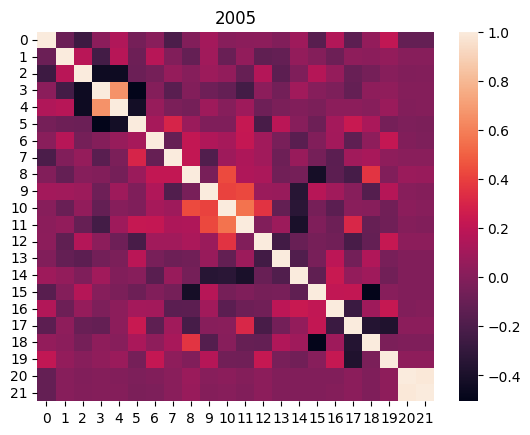

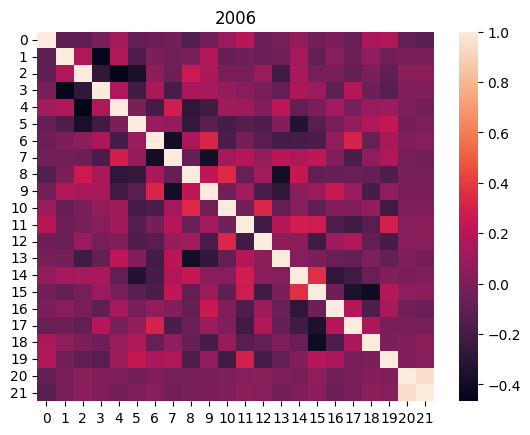

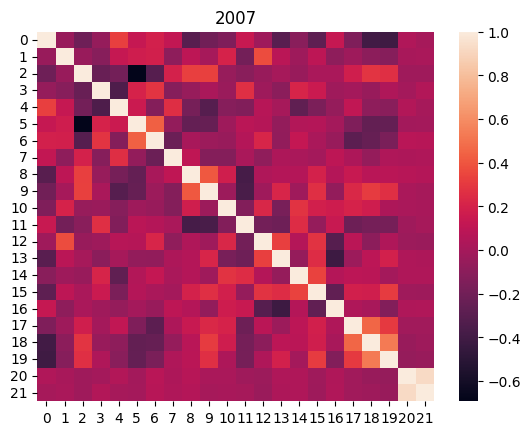

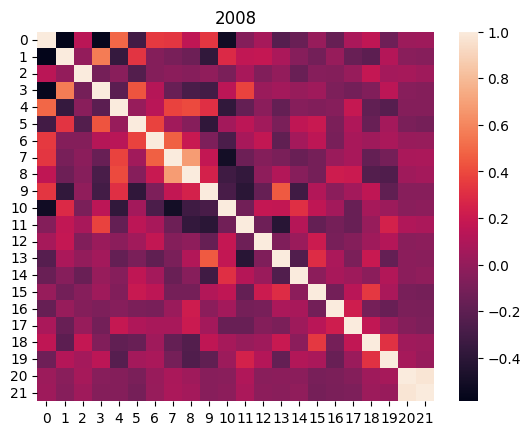

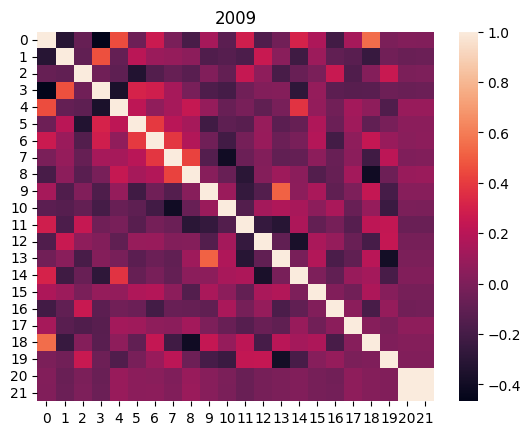

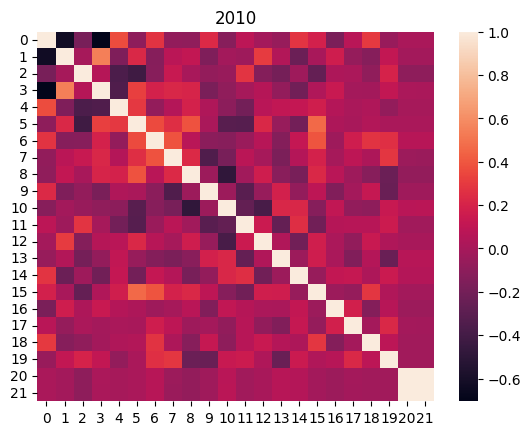

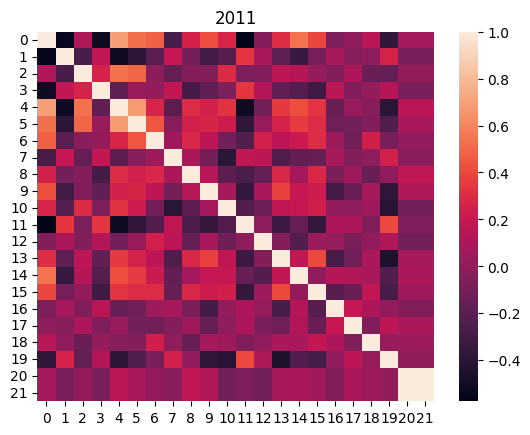

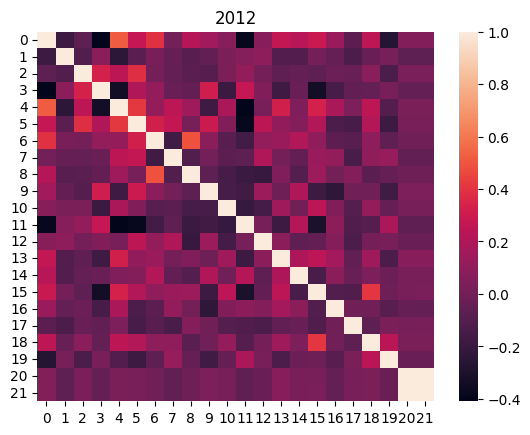

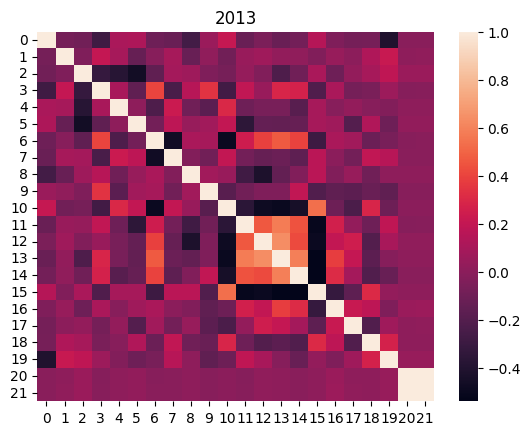

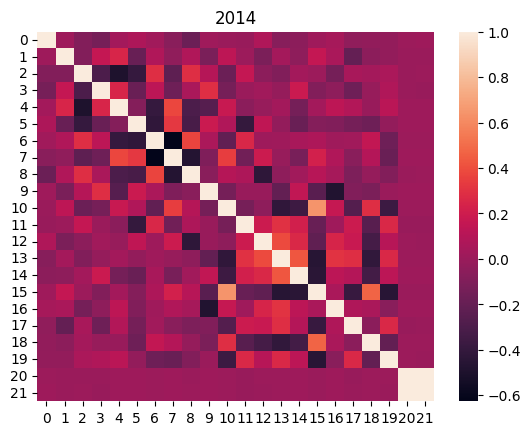

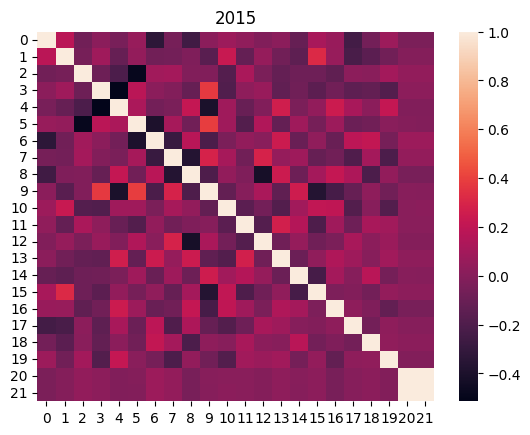

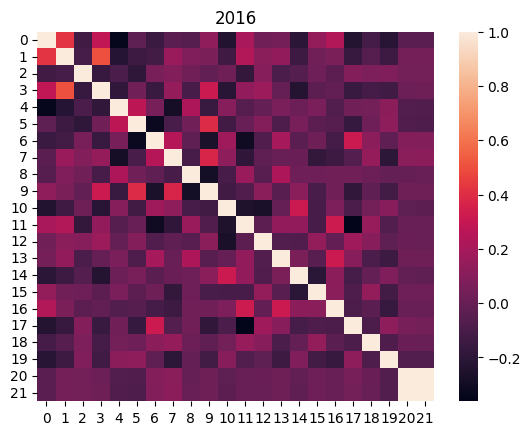

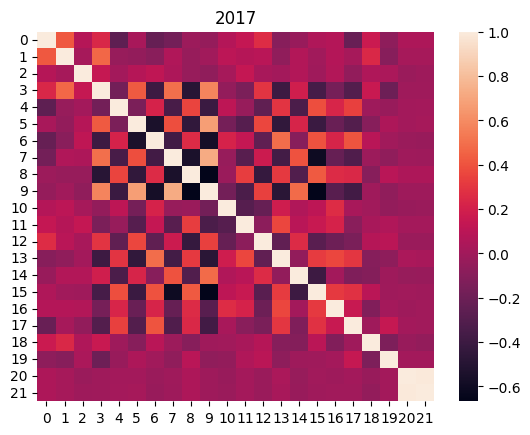

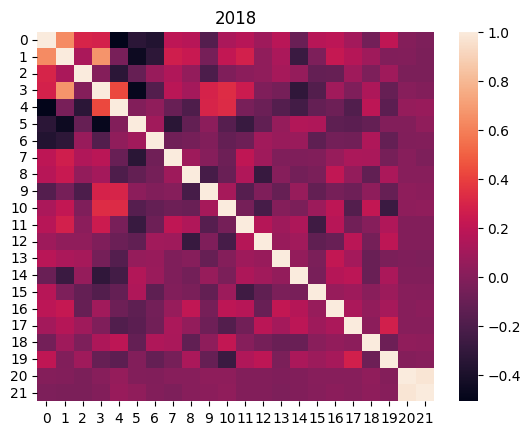

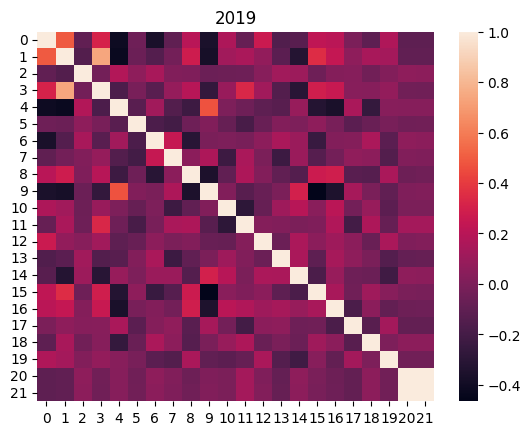

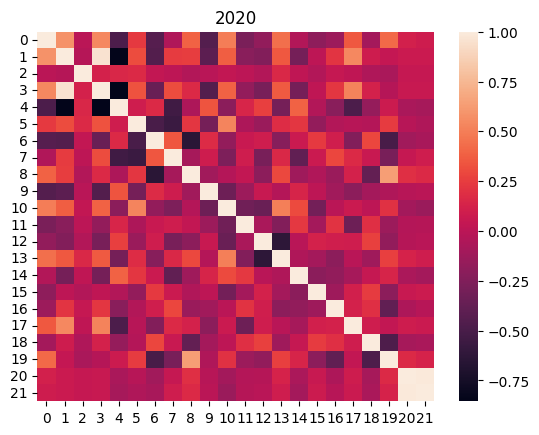

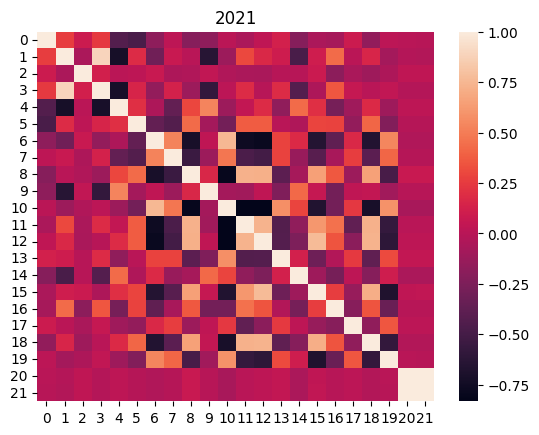

In [77]:
for kx in range(2022-2005):
    sb.heatmap(cor_20_all_dict[f"{2005+kx}"])
    plt.title(f"{2005+kx}")
    plt.show()

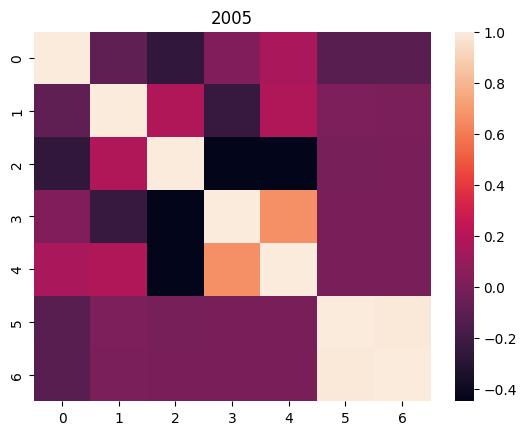

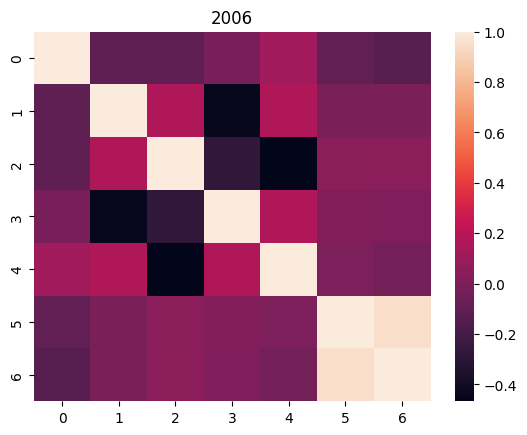

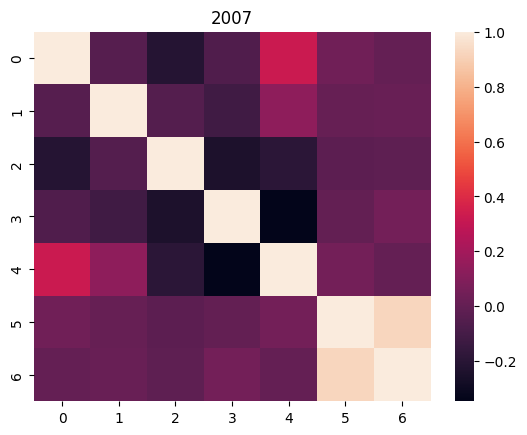

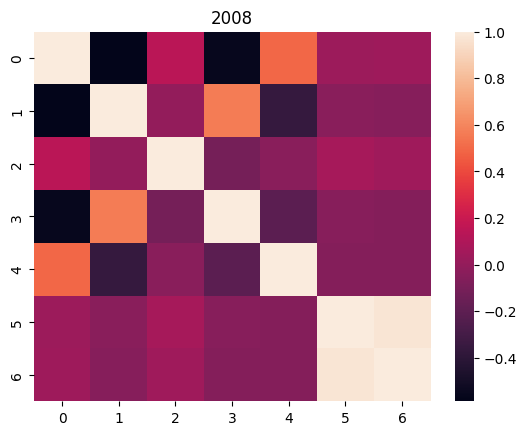

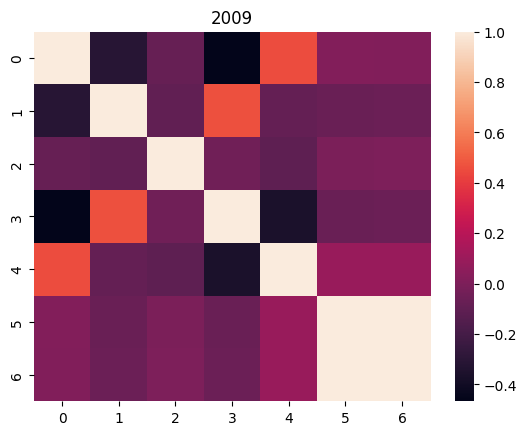

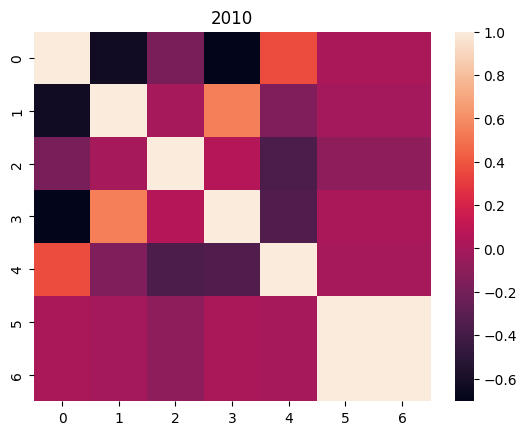

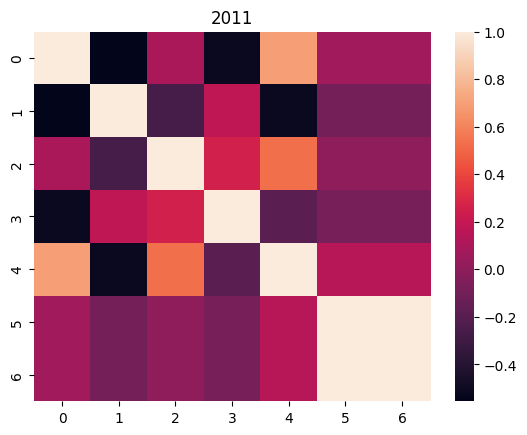

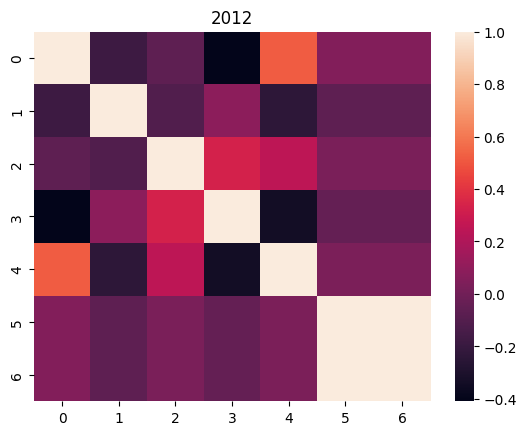

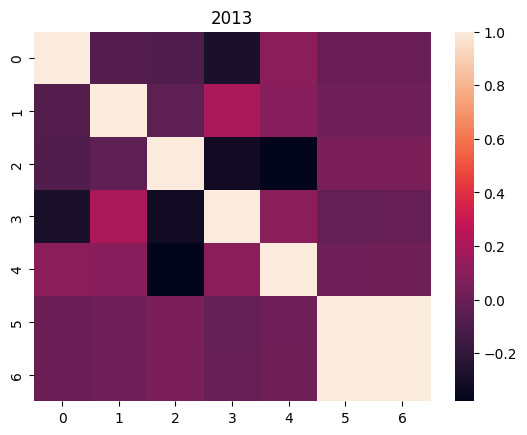

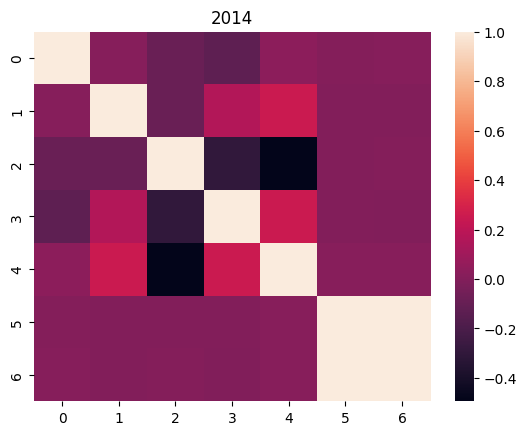

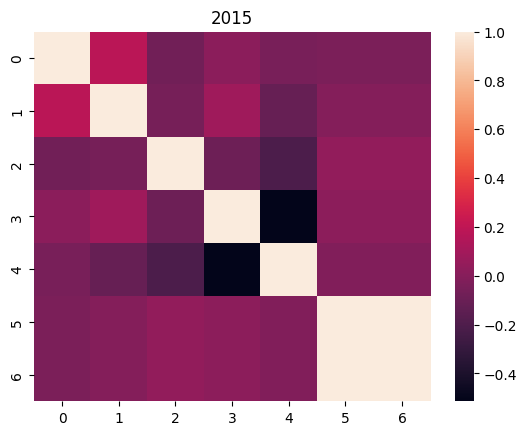

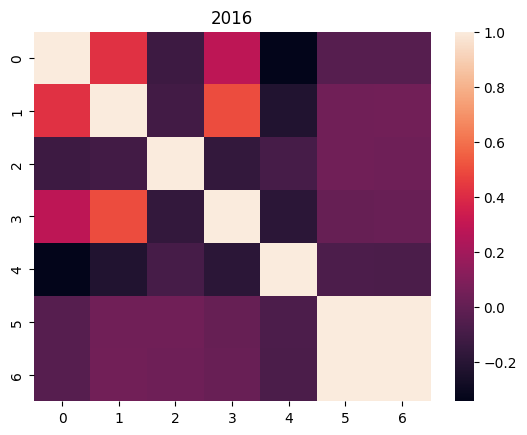

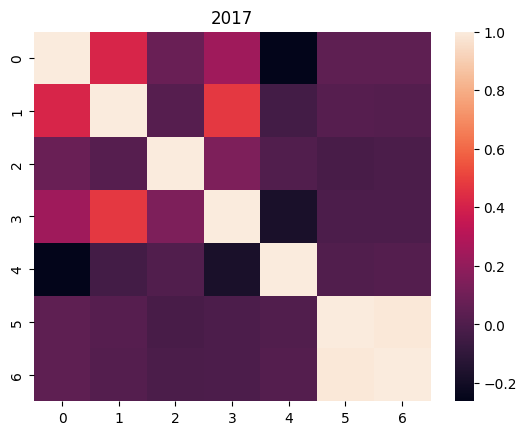

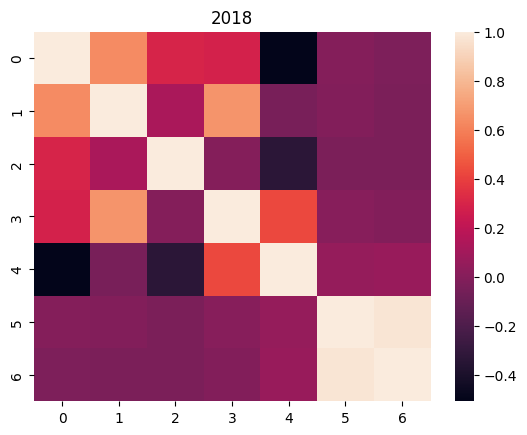

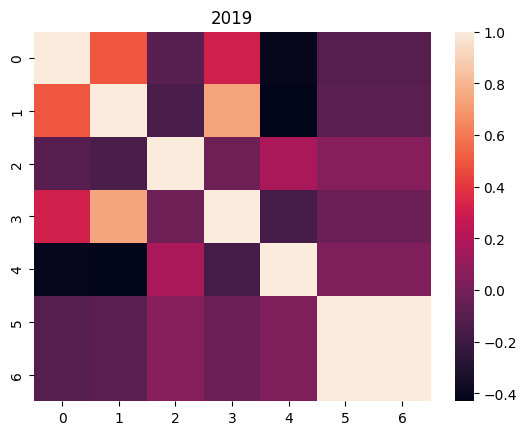

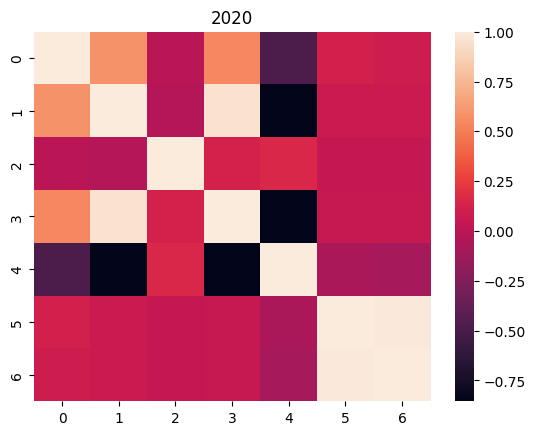

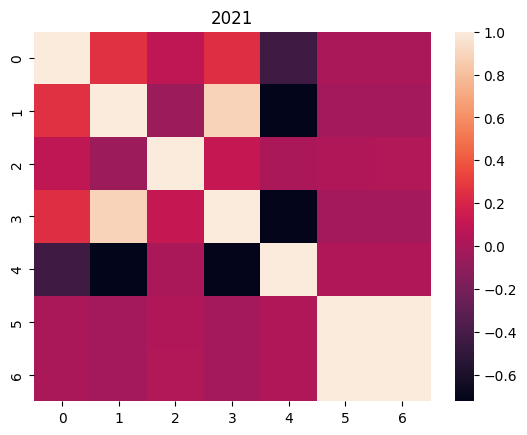

In [76]:
for kx in range(2022-2005):
    sb.heatmap(cor_5_all_dict[f"{2005+kx}"])
    plt.title(f"{2005+kx}")
    plt.show()